<a href="https://colab.research.google.com/github/LuisaUpegui/boston_housing/blob/main/cancer_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #Dar acceso al drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/Modulo 2/archivos/cancer.csv"
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Revisar si hay balance entre las categorias.
#No hay balance en las categorias la categoria benigno tiene más datos más del 50%(0.62)
#mientras que la categoria Maligno tiene 37%
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [6]:
#Convertir los valores de clase categorica a númerica
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [7]:
# Definir X y y 
y = df['diagnosis']
X = df.drop(columns = 'diagnosis')

In [8]:
# Realizar el train split a los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Baggin regressor

In [9]:
from sklearn.ensemble import BaggingRegressor

In [10]:
#Instanciar el modelo
bagreg = BaggingRegressor(random_state = 42)

In [11]:
#entrenar el modelo en los datos, almacenando la información aprendida de los datos.
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [12]:
bagreg.predict(X_test)


array([0. , 1. , 1. , 0. , 0. , 1. , 1. , 0.8, 1. , 0. , 0.1, 1. , 0. ,
       0.8, 0.1, 1. , 0. , 0. , 0. , 1. , 0.2, 0. , 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 1. , 0. , 0. , 0.3, 0. , 0. , 0. , 1. , 0. , 1. ,
       0. , 0. , 1. , 0. , 0. , 0.5, 0. , 0.2, 0.1, 0. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0.8, 0. , 0. , 1. , 1. , 0. , 0. ,
       0. , 1. , 0.9, 0. , 0. , 1. , 1. , 0. , 1. , 0. , 0.1, 0. , 0.3,
       0. , 0.1, 1. , 0. , 0.2, 1. , 0.8, 1. , 0.9, 1. , 0. , 0. , 0. ,
       0.4, 0.2, 0. , 0. , 0. , 1. , 1. , 0. , 1. , 0.9, 0. , 0.9, 1. ,
       0. , 0. , 0. , 1. , 0.6, 0.2, 1. , 0. , 0.3, 1. , 0.5, 1. , 0. ,
       0.1, 0.1, 1. , 0.6, 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 1. ,
       1. , 1. , 0. , 0. , 0.1, 0.8, 0.7, 0. , 0.4, 1. , 0. , 1. , 0. ])

In [13]:
#evaluar el rendimiento del modelo, se obtuvo un R2 de 0.83--> el 83% de los datos se ajusta el modelo sin embargo el decision tree 
#anterior se ajustaba mejor
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9608648214623087
0.8387307532251352


# Random forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)

In [15]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=400,
                      n_jobs=4)

In [16]:
rf.predict(X_test)

array([0.14297645, 0.93448548, 0.93448548, 0.04686822, 0.01758733,
       0.93448548, 0.93448548, 0.89776893, 0.71315158, 0.07074517,
       0.10215196, 0.92600457, 0.13246071, 0.67166359, 0.0336996 ,
       0.93448548, 0.09949316, 0.02421239, 0.0056626 , 0.93448548,
       0.26861501, 0.06697472, 0.93448548, 0.04449907, 0.04397944,
       0.42067773, 0.10816973, 0.07822068, 0.05767001, 0.93448548,
       0.04534513, 0.00719796, 0.03006928, 0.09529572, 0.00414564,
       0.02706346, 0.36683486, 0.03537431, 0.93448548, 0.16927977,
       0.03453233, 0.93448548, 0.04691622, 0.04296025, 0.39993317,
       0.05384843, 0.00933722, 0.04471388, 0.05193842, 0.09376901,
       0.93448548, 0.93448548, 0.23353095, 0.44457546, 0.04028509,
       0.13925797, 0.04941469, 0.93448548, 0.72224681, 0.03504837,
       0.08540012, 0.93448548, 0.93448548, 0.1113106 , 0.04265581,
       0.10323329, 0.93448548, 0.93448548, 0.02313086, 0.13472525,
       0.78673475, 0.93448548, 0.12139011, 0.93448548, 0.04246

In [17]:
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [18]:
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(train_score)
print(test_score)

0.8044674503651057
0.7973872971740554


Tratemos de mejorar el modelo 

In [19]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(5, 25))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

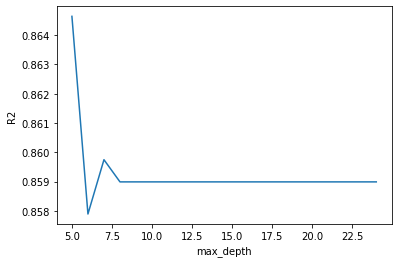

In [20]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [21]:
#El Random forest ajustado obtuvo un R2 de 0.86 sin embargo el R2 para el set de datos de entrenamiento es 0.1 mayor 
#lo que indica un overfitting 
dec_tree_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.9673695366116335
0.8646418473381899


# Conclusión

Los datos se ajustan mejor al decision tree, en este se obtuvo un R2 de 0.95 para los datos de entrenamientos, mientras que en los otros dos modelos este no supero el 0.9

# Decision  tree

In [22]:
# Instancial el decision tree
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2, criterion = 'gini',)

In [23]:
# Ajustar el modelo 
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:
# Predicciones 
dec_tree.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [25]:
# Obtenemos un R2 de 0.9160 lo que quiere decir que el 91% de los datos se ajusta a nuestro modelo 
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9460093896713615
0.916083916083916


Tratemos de mejorar el modelo

In [26]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(5, 25))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

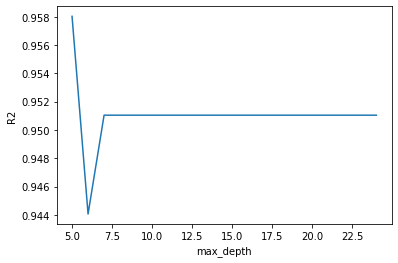

In [27]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [28]:
#Se mejoro el modelo paso de 0.91 a 0.95, lo que quiere decir que el 95% de los datos se ajusta al modelo
dec_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.9953051643192489
0.958041958041958


**Predicción y evaluación del modelo**


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
#Matriz de confusión
predicciones = dec_tree_5.predict(X = X_test,)
cnf_matrix = metrics.confusion_matrix(y_test, predicciones)
cnf_matrix

array([[85,  4],
       [ 2, 52]])

Text(0.5, 257.44, 'Predicted label')

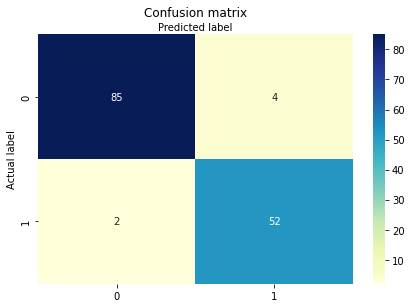

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
#En la matriz de confusión podemos ver los siguiente, 
#85: verdaderos negativos
#2: falsos negativos --> Resultado de cancer negativo la persona sí tiene cancer
#4: fasos positivos  --> Resultado de cancer positivo la persona no tiene cancer
#52: verdaderos positivos 

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, predicciones))
print("Precision:",metrics.precision_score(y_test, predicciones))
print("Recall:",metrics.recall_score(y_test, predicciones))

Accuracy: 0.958041958041958
Precision: 0.9285714285714286
Recall: 0.9629629629629629


**¿Cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen**


El resultado más problematico es un falso negativo (decirle a una personas que no tiene cancer cuando realmente si lo tiene), ya que posiblemente esta persona no continue realizandose chequeos llevando a que el  tumor más crezca o haga metastasis.
Mientras que un resultado falso positivo, la persona puede continuar con chequeos medicos que determinen que realmente no tiene la enfermedad. 